In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv') # read the data as a data frame

In [3]:
pdata.head() #checking the head of the data frame

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Basic EDA

In [46]:
pdata.shape

(5000, 14)

In [47]:
pdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### - The dataframe has 5000 rows and 14 columns with 13 integer type and 1 float type

Dropping/ignoring ID.Also replacing the categorical variable with actual values

In [4]:
pdata = pdata.drop(['ID'],axis=1)
pdata['Education'] = pdata['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
pdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


## Creating Dummy Variables
Values like 'Undergrad' cannot be read into an equation. Using substitutes like 1 for Undergrad, 2 for Graduate and 3 for Advanced/Professional would end up implying that Graduate people fall exactly half way between Undergrad and Advanced/Professional! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with different titles equivalent to "Is this person Undergrad?", "Is this person graduate?" and "Is this person Advanced/Professional?". These will be used as independent variables without imposing any kind of ordering between the three categories.

In [5]:
pdata = pd.get_dummies(pdata,columns=['Education'])
pdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


## Identify Correlation in data 

In [50]:
pdata.corr() #we can drop zipcode as shown below

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.045838,-0.016264,-0.027770
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,0.020967,-0.018197,-0.002907
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.108878,-0.128364,0.218019
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691,-0.034123,0.037141,-0.002122
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.008744,0.139201,-0.118628
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.080413,-0.090366,0.156979
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.014942,-0.031806,0.042841
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.090212,0.071491,-0.148894
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.012421,0.005134,0.006863
CD Account,0.008043,0.010353,0.169738,0.019972,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.009780,0.006089,-0.014630


### - From above we can say that the correlation between variables are very low,except for Age and experience are highly correlated which is kind of expected, Income and CCAvg also have a slighly good correlation between them 

In [6]:
#dropping zipcode as it is not adding any significant value to the output 
# variable(Personal Loan) in this particular personal loan scenario also the correlation is negligible with output variable. 
pdata = pdata.drop(['ZIP Code'],axis=1)
pdata.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [52]:
pdata.describe().T # Five point summary

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


### - Mortgage value have the highest variance(deviation) , which will be justified by the boxplot/histogram below.
### - Looking at the age column, data looks representative of the true age distribution of the middle age population
### - 75% of the people have family size of 3 or more than 3.
### - More than 50% 0f people use internet banking facility.

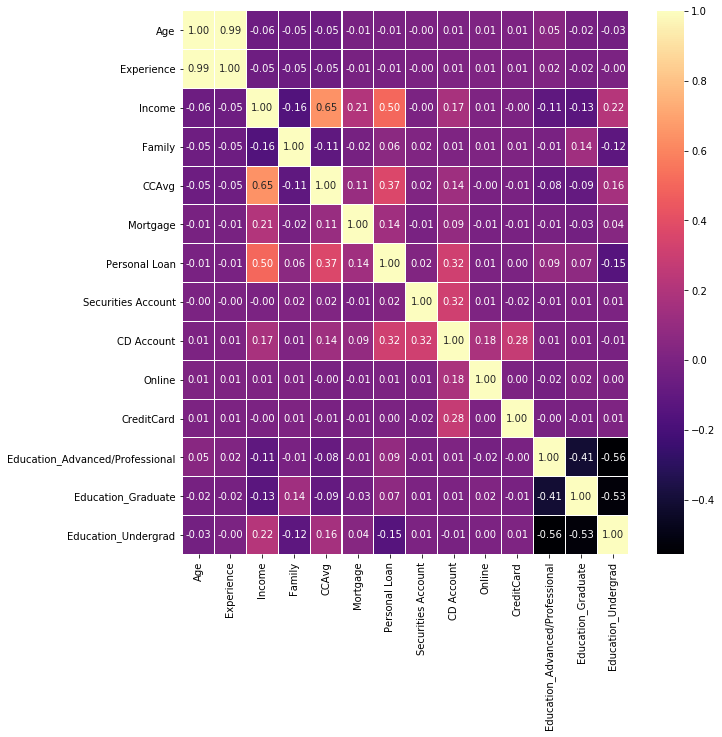

In [53]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(pdata.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

### - In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
### - From above we can say that the correlation between variables are very low,except for Age and experience are highly correlated which is kind of expected, Income and CCAvg also have a slighly good correlation between them

### - People having high income tends to have more average spending on credit cards.

In [54]:
pdata.isnull().values.any()

False

### - There are no any null values in the dataset.

## Histogram Plots to see the distribution of the each features individually

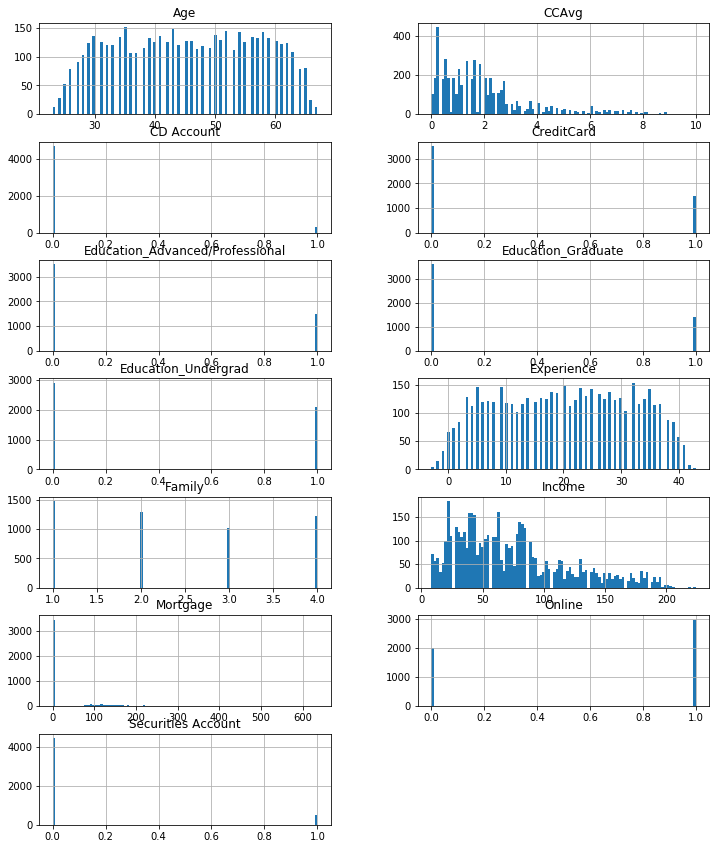

In [55]:
columns = pdata.columns.values.tolist()
columns.remove('Personal Loan') # Excluding Outcome column
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

### - CCAvg,Income,Mortgage are right skewed, with CCAvg and Mortgage highly skewed.
### - Age and Experience seems to be randomly distributed , it has no apparent pattern. 
### - Mortgage have quite a lot of extreme values.

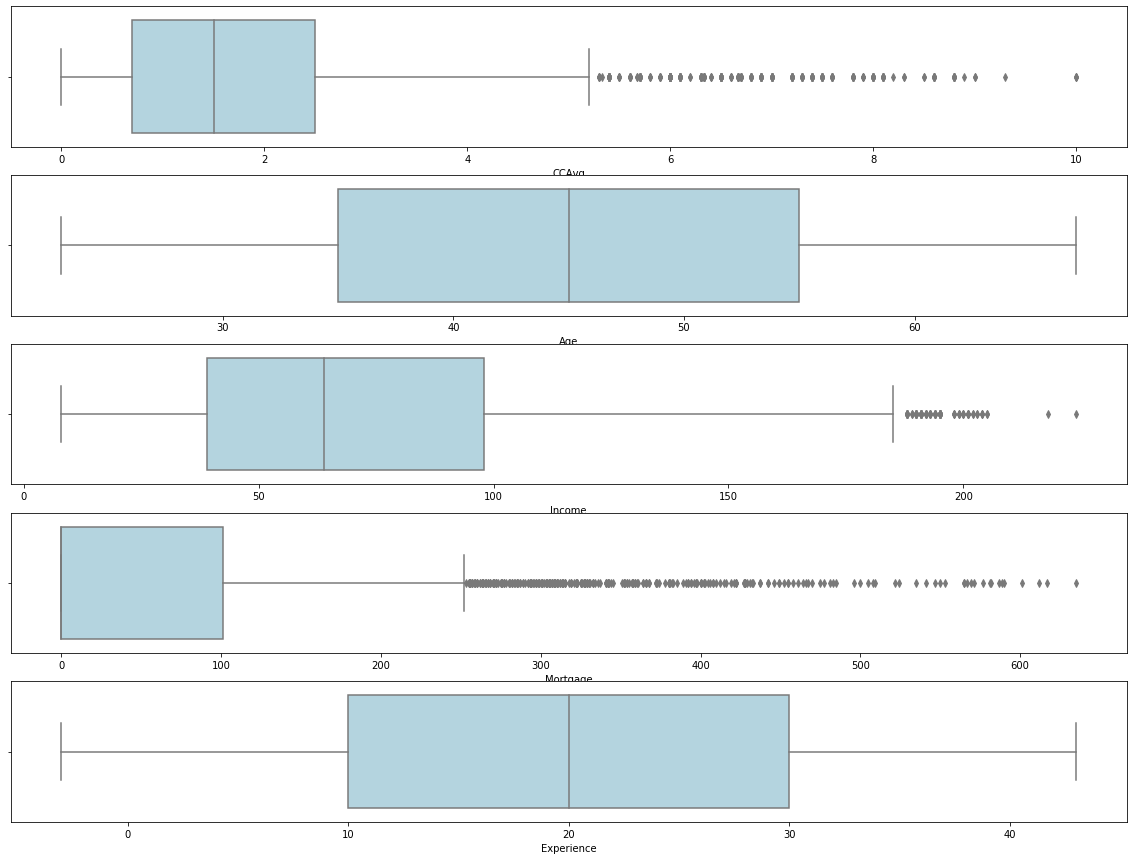

In [56]:
# Box plot to detect the presence of outliers for continuous variables.

plt.figure(figsize= (20,15))
plt.subplot(5,1,1)
sns.boxplot(x= pdata.CCAvg, color='lightblue')

plt.subplot(5,1,2)
sns.boxplot(x= pdata.Age, color='lightblue')

plt.subplot(5,1,3)
sns.boxplot(x= pdata.Income, color='lightblue')

plt.subplot(5,1,4)
sns.boxplot(x= pdata.Mortgage, color='lightblue')

plt.subplot(5,1,5)
sns.boxplot(x= pdata.Experience, color='lightblue')

plt.show()

### - As mentioned above there are outliers for CCAvg,Income,Mortgage and these variables are right skewed
### - Mortgage, as it is highly skewed, there are quiet a lot of extreme values.
### - There are no outliers for Age and experience column and most of the people are between 35 to 55 years of    ###    age and most of the people have professional experience between 10 to 30 years

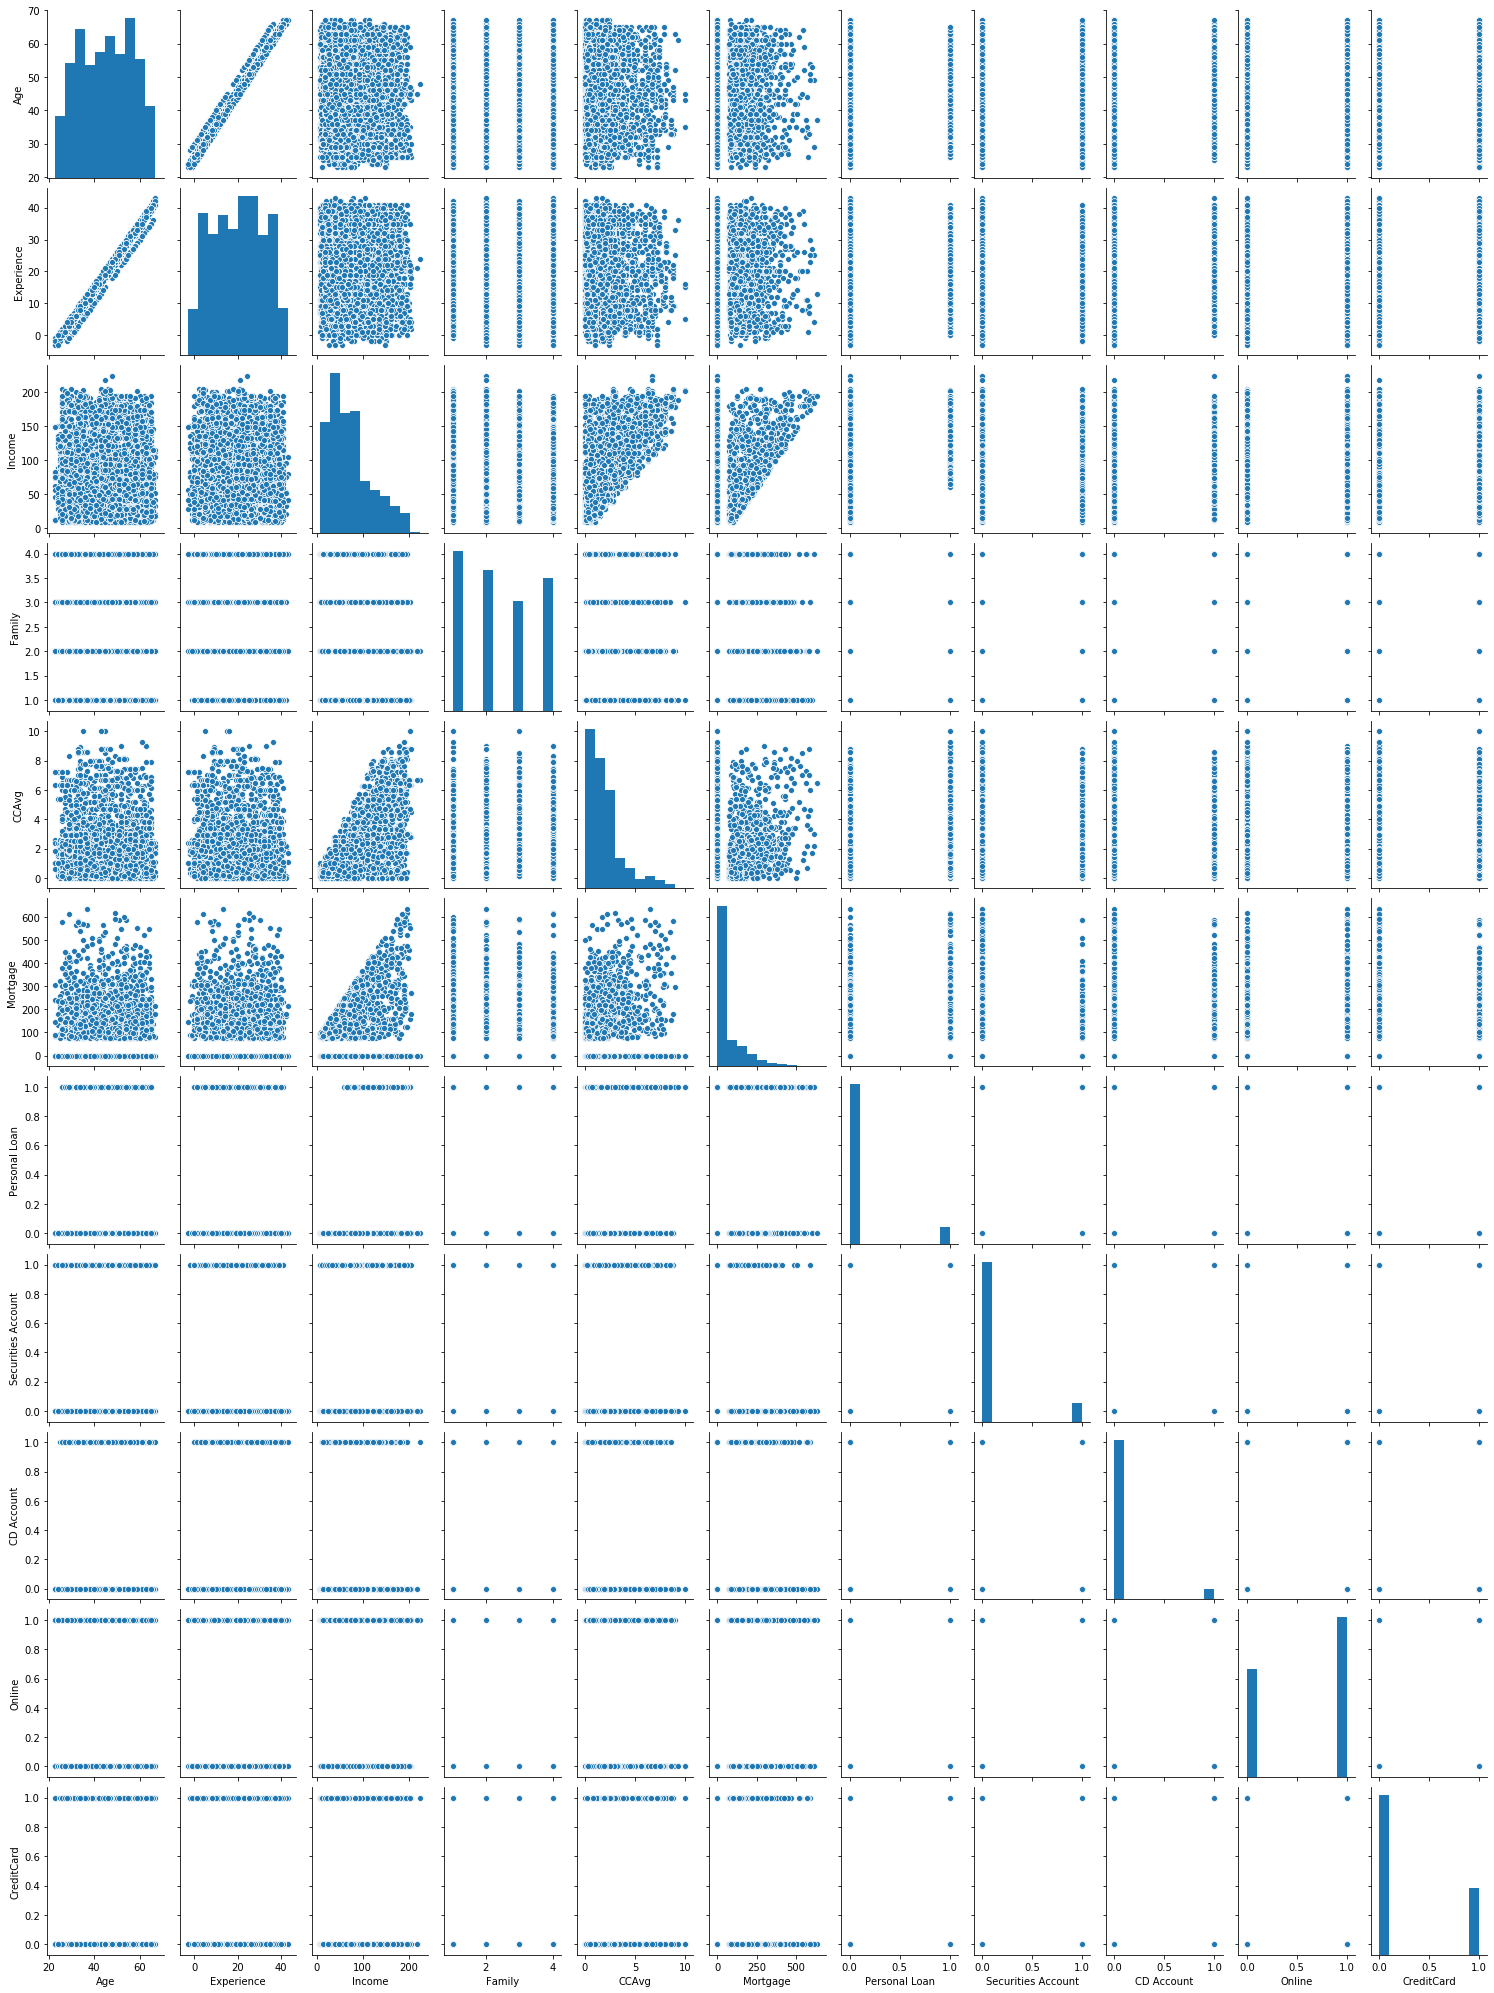

In [7]:
pdata_attr = pdata.iloc[:, 0:11] #Removing dummy variables in pair plot
sns.pairplot(pdata_attr,aspect=0.75) #Bivariate analysis

### - From above we can say that the correlation between variables are very low,except for Age and experience are highly correlated which is kind of expected.
### - Income and CCAvg also have a slighly good correlation between them .
### - People having high income tends to have more average spending on credit cards.

## Target column distribution

In [58]:
n_true = len(pdata.loc[pdata['Personal Loan'] == True])
n_false = len(pdata.loc[pdata['Personal Loan'] == False])
print("Number of successful cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Failed cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of successful cases: 480 (9.60%)
Number of Failed cases: 4520 (90.40%)


### - So we have 9.60% of people in current data set who accepted personal loan offered in the last campaign.
### - The conversion rate success is very low, which is a not a good distribution success/Failed cases of people accepting personal loans in data.

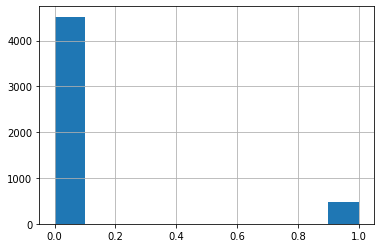

In [59]:
pdata['Personal Loan'].hist(stacked=False)

### - The above histogram shows that the number of people who accepted personal loan are extrmely low as compared to people who didn't opt for it.

## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [8]:
# Buildng logistic model

from sklearn.model_selection import train_test_split

# independant variables(dropping one of the dummy variables as we can get the same information from any 2 dummy variables)
X = pdata.drop(['Education_Advanced/Professional','Personal Loan'],axis=1)  # Predictor feature columns 
# the dependent variable               
Y = pdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergrad
1334,47,22,35,2,1.3,0,0,0,1,0,0,1
4768,38,14,39,1,2.0,0,0,0,1,0,1,0
65,59,35,131,1,3.8,0,0,0,1,1,0,1
177,29,3,65,4,1.8,244,0,0,0,0,1,0
4489,39,13,21,3,0.2,0,0,0,1,0,1,0


Lets check split of data

In [61]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Personal Loan True/False ratio in split data

In [62]:
print("Original Personal Loan True Values     : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Personal Loan  False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Personal Loan  True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan  False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan  True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan  False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values     : 480 (9.60%)
Original Personal Loan  False Values   : 4520 (90.40%)

Training Personal Loan  True Values    : 331 (9.46%)
Training Personal Loan  False Values   : 3169 (90.54%)

Test Personal Loan  True Values        : 149 (9.93%)
Test Personal Loan  False Values       : 1351 (90.07%)



# Logistic Regression

In [63]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Here are the coefficients for each variable and the intercept

In [64]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, logistic_model.coef_[0][idx]))

The coefficient for Age is -0.2753233169886644
The coefficient for Experience is 0.275873792967661
The coefficient for Income is 0.05388712080475064
The coefficient for Family is 0.5851389451804992
The coefficient for CCAvg is 0.19326127481059208
The coefficient for Mortgage is 0.0009277967924636047
The coefficient for Securities Account is -0.8338725049313042
The coefficient for CD Account is 3.132549835973274
The coefficient for Online is -0.5811731587180482
The coefficient for CreditCard is -0.8570076753491771
The coefficient for Education_Graduate is -0.14486970187461606
The coefficient for Education_Undergrad is -3.7305231630110787


In [65]:
intercept = logistic_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.5449188200545523


In [66]:
#predict on test
lm_predict = logistic_model.predict(x_test)

The score for in-sample(train data) and out of sample(test data)

In [67]:
acc_model_score = logistic_model.score(x_train, y_train)
print(acc_model_score)

0.9577142857142857


In [68]:
acc_model_score = logistic_model.score(x_test, y_test)
print(acc_model_score)

0.9573333333333334


### - The above score is a pretty good score which shows that the prediction was correct approx 95% of the time while it was incorrect for 5 % of the time. 

[[  95   54]
 [  10 1341]]


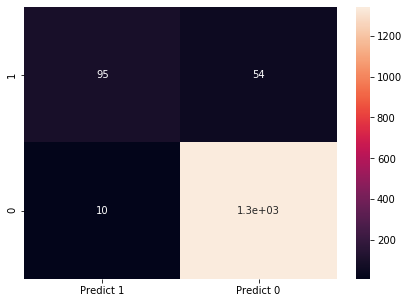

In [69]:
cm=metrics.confusion_matrix(y_test, lm_predict, labels=[1, 0])

print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that the likelihood of a liability customer buying Personal Loans 95

True Negatives (TN): we correctly predicted that customers not buying personal loan 1341

False Positives (FP): we incorrectly predicted that customers bought personal loan (a "Type I error") 10
                      Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that customers did not buy personal loan but in actual he did buy the loan
                      (a "Type II error") 54 Falsely predict negative Type II error

# Naive Bayes algorithm 

In [70]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
naive_model = GaussianNB()

naive_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of our model with training data

In [71]:
nv_predict = naive_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nv_predict)))
print()

Model Accuracy: 0.8949



### Performance of our model with testing data

In [72]:
nv_predict = naive_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nv_predict)))
print()

Model Accuracy: 0.8820



### Confusion matrix

Confusion Matrix
[[  87   62]
 [ 115 1236]]


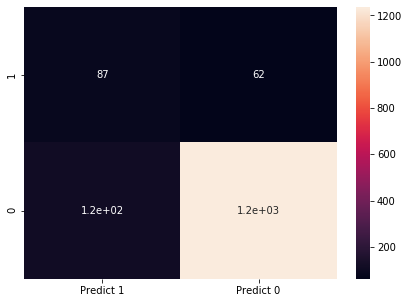

In [73]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, nv_predict, labels=[1, 0])
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that the likelihood of a liability customer buying Personal Loans 87

True Negatives (TN): we correctly predicted that customers not buying personal loan 1236

False Positives (FP): we incorrectly predicted that customers bought personal loan (a "Type I error") 115
                      Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that customers did not buy personal loan but in actual he did buy the loan
                      (a "Type II error")  62 Falsely predict negative Type II error

# Standardizing data for kNN Model

In [11]:
# converting the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

xScaled  = X.apply(zscore)  # convert all attributes to Z scale 

xScaled.describe()

xScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   float64
 1   Experience           5000 non-null   float64
 2   Income               5000 non-null   float64
 3   Family               5000 non-null   float64
 4   CCAvg                5000 non-null   float64
 5   Mortgage             5000 non-null   float64
 6   Securities Account   5000 non-null   float64
 7   CD Account           5000 non-null   float64
 8   Online               5000 non-null   float64
 9   CreditCard           5000 non-null   float64
 10  Education_Graduate   5000 non-null   float64
 11  Education_Undergrad  5000 non-null   float64
dtypes: float64(12)
memory usage: 468.9 KB


In [75]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(xScaled, Y, test_size=0.30, random_state=1)

# Build kNN Model

In [76]:
# Call Nearest Neighbour algorithm , Here I am taking k as 5 we can increase and decrease k to evaluate the
# performance score.
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)
NH_labels = NNH.predict(x_test)
print(accuracy_score(y_test,NH_labels))
print(recall_score(y_test,NH_labels))

0.956
0.5906040268456376


In [77]:
#Instantiate learning model(k=9)
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
NNH.fit(x_train, y_train)
NH_labels9 = NNH.predict(x_test)
print(accuracy_score(y_test,NH_labels9))

0.9533333333333334


In [78]:
#Instantiate learning model(k=20)
NNH = KNeighborsClassifier(n_neighbors= 20 , weights = 'distance' )
NNH.fit(x_train, y_train)
NH_labels20 = NNH.predict(x_test)
print(accuracy_score(y_test,NH_labels20))

0.9413333333333334


### - From above we can say that increasing k does not increase the performance

Confusion Matrix
[[  88   61]
 [   5 1346]]


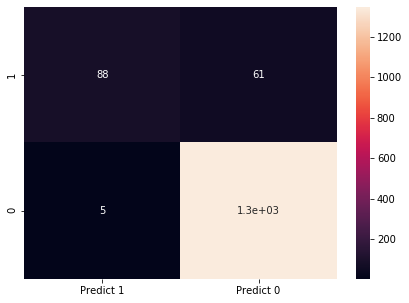

In [79]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, NH_labels, labels=[1, 0])
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that the likelihood of a liability customer buying Personal Loans 88

True Negatives (TN): we correctly predicted that customers not buying personal loan 1346

False Positives (FP): we incorrectly predicted that customers bought personal loan (a "Type I error") 5
                      Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that customers did not buy personal loan but in actual he did buy the loan
                      (a "Type II error")  61 Falsely predict negative Type II error

# Comments on which is the best model

### Classification report for Logistic Regression model

In [80]:
print("Classification Report")
print(metrics.classification_report(y_test, lm_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.90      0.64      0.75       149
           0       0.96      0.99      0.98      1351

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.86      1500
weighted avg       0.96      0.96      0.95      1500



### Classification report for Naive Bayes model

In [41]:
print("Classification Report")
print(metrics.classification_report(y_test, nv_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.43      0.58      0.50       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.69      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500



### Classification report for KNN model

In [42]:
print("Classification Report")
print(metrics.classification_report(y_test, NH_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.59      0.73       149
           0       0.96      1.00      0.98      1351

    accuracy                           0.96      1500
   macro avg       0.95      0.79      0.85      1500
weighted avg       0.96      0.96      0.95      1500



### - As per my opinion FN should be minimised because if my model wrongly predicts that the person has not accepted the personal loan offered then the bank will end up  spending more on compaign to increase the conversion rate, which in turn will cost the bank more.
### - So I should look for model which has high recall score. Looking at the classification report for each model above, we can say that Logistic regression has recall as more than 60%(greater than other 2 models) so it is the best model in this problem statement .
### Also if we talk about F1 score logistic reression has the highest score among the three